# Smalltalk embeddings

In [20]:
import matplotlib.pyplot as plt
import torch.nn.functional

from training.src.trainer import Trainer
from training.src.tester import Tester
from dataset_utils.create_dataset import environment, traces
import os

## Training

In [21]:
dir_output = os.path.normpath("../resulting_models") + os.path.normpath("/")
classes_with_ids = environment.get_classes_with_ids()
ids_with_classes = { class_id:class_name for class_name, class_id in classes_with_ids.items()}
environment_classes_ids = set(classes_with_ids.values())

environment_method_pairs = environment.get_class_method_pairs()
trainer = Trainer(environment_method_pairs, environment_classes_ids, 14, 3, 30)
trainer.train_for_multiple_traces(traces)

tester = Tester(trainer, ids_with_classes)

Epoch - 0
--- Method 0 ---
Loss: 0.008
--- End of Step ---
--- Method 1 ---
Loss: 0.008
--- End of Step ---
--- Method 2 ---
Loss: 0.008
--- End of Step ---
--- Method 3 ---
Loss: 0.007
--- End of Step ---
--- Method 4 ---
Loss: 0.007
--- End of Step ---
--- Method 5 ---
Loss: 0.007
--- End of Step ---
--- Method 6 ---
Loss: 0.007
--- End of Step ---
--- Method 7 ---
Loss: 0.007
--- End of Step ---
--- Method 8 ---
Loss: 0.007
--- End of Step ---
--- Method 9 ---
Loss: 0.007
--- End of Step ---
--- Method 10 ---
Loss: 0.006
--- End of Step ---
--- Method 11 ---
Loss: 0.006
--- End of Step ---
--- Method 12 ---
Loss: 0.006
--- End of Step ---
--- Method 13 ---
Loss: 0.006
--- End of Step ---
--- Method 14 ---
Loss: 0.006
--- End of Step ---
--- Method 15 ---
Loss: 0.006
--- End of Step ---
--- Method 16 ---
Loss: 0.006
--- End of Step ---
--- Method 17 ---
Loss: 0.006
--- End of Step ---
--- Method 18 ---
Loss: 0.006
--- End of Step ---
--- Method 19 ---
Loss: 0.005
--- End of Step ---


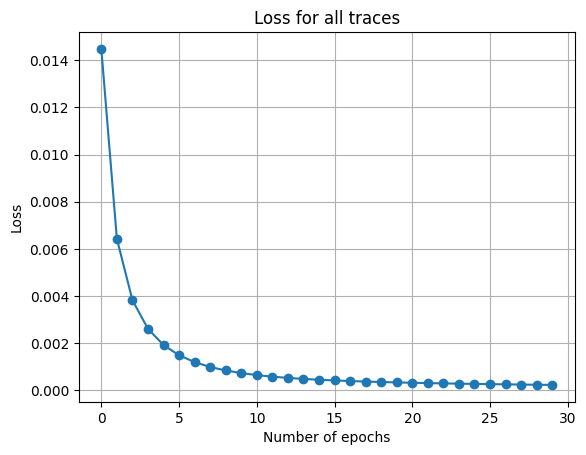

In [22]:
trainer.show_loss_results()

### Cosine distance for OperatorDictionary with other classes

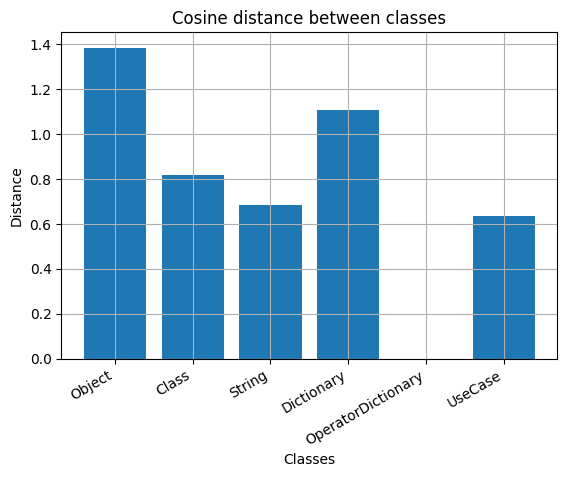

In [23]:
tester.plot_class_distances(classes_with_ids["OperatorDictionary"], set(classes_with_ids.values()))

### Cosine Distance for method other_two_values

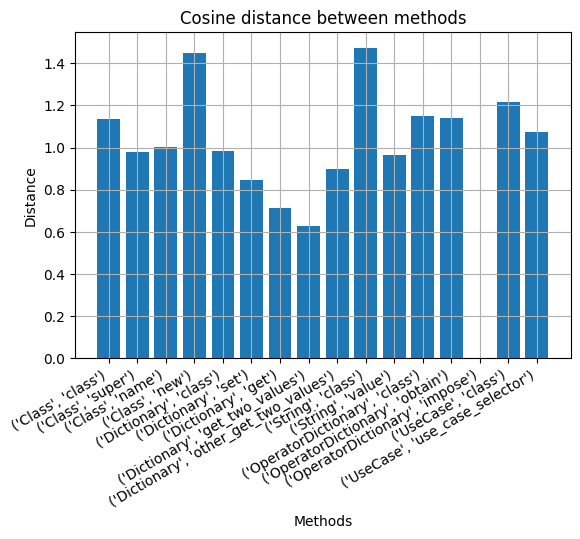

In [24]:
tester.plot_method_distances(("OperatorDictionary", "impose"), environment_method_pairs)

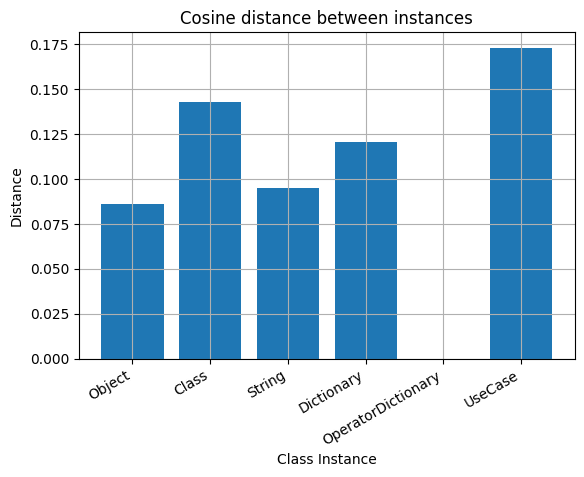

In [25]:
embedding_instance_OpD = tester.get_instance_embedding_of(classes_with_ids["OperatorDictionary"])
map_of_embedding_instances = {}
for class_name, class_id in classes_with_ids.items():
    embedding_instance = tester.get_instance_embedding_of(class_id)
    map_of_embedding_instances[class_name] = 1 - torch.nn.functional.cosine_similarity(embedding_instance, embedding_instance_OpD).item()
fig, ax = plt.subplots()

classes = list(map_of_embedding_instances.keys())
distances = list(map_of_embedding_instances.values())

ax.bar(range(len(classes)), distances, tick_label=classes)
fig.autofmt_xdate()
ax.set_title("Cosine distance between instances")
ax.set_xlabel("Class Instance")
ax.set_ylabel("Distance")
ax.grid()

plt.savefig('result_instances.png')

plt.show()

## Training for multiple embedding sizes

In [19]:
def set_title_and_results_for_plot(axis, i,j,title,results):
    axis[i,j].plot(list_of_embedding_sizes, results)
    axis[i,j].set_title(title)
    axis[i,j].set_xlabel("Embedding Size")
    axis[i,j].set_ylabel("Distance")
    axis[i,j].grid()

Epoch - 0
--- Method 0 ---
Loss: 0.002
--- End of Step ---
--- Method 1 ---
Loss: 0.002
--- End of Step ---
--- Method 2 ---
Loss: 0.001
--- End of Step ---
--- Method 3 ---
Loss: 0.001
--- End of Step ---
--- Method 4 ---
Loss: 0.001
--- End of Step ---
--- Method 5 ---
Loss: 0.001
--- End of Step ---
--- Method 6 ---
Loss: 0.001
--- End of Step ---
--- Method 7 ---
Loss: 0.001
--- End of Step ---
--- Method 8 ---
Loss: 0.001
--- End of Step ---
--- Method 9 ---
Loss: 0.001
--- End of Step ---
--- Method 10 ---
Loss: 0.001
--- End of Step ---
--- Method 11 ---
Loss: 0.001
--- End of Step ---
--- Method 12 ---
Loss: 0.001
--- End of Step ---
--- Method 13 ---
Loss: 0.001
--- End of Step ---
--- Method 14 ---
Loss: 0.001
--- End of Step ---
--- Method 15 ---
Loss: 0.001
--- End of Step ---
--- Method 16 ---
Loss: 0.001
--- End of Step ---
--- Method 17 ---
Loss: 0.001
--- End of Step ---
--- Method 18 ---
Loss: 0.001
--- End of Step ---
--- Method 19 ---
Loss: 0.001
--- End of Step ---


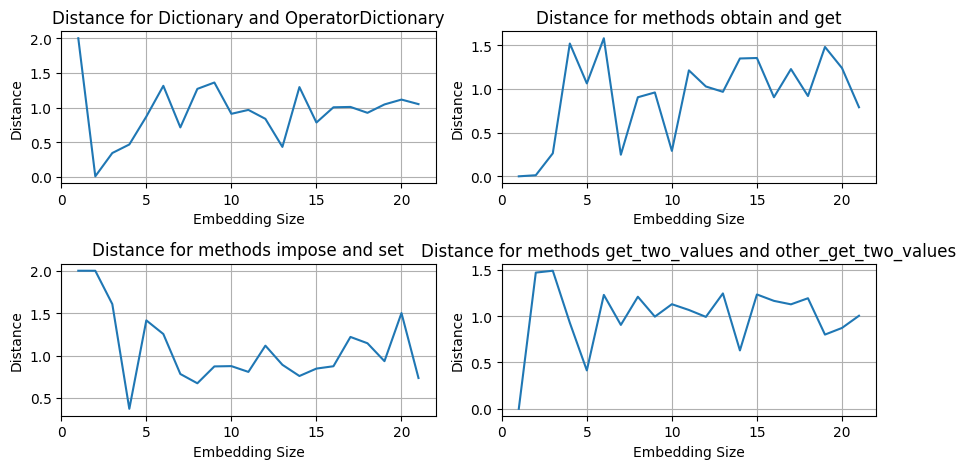

In [21]:
dir_output = os.path.normpath("../resulting_models") + os.path.normpath("/")
classes_with_ids = environment.get_classes_with_ids()
ids_with_classes = { class_id:class_name for class_name, class_id in classes_with_ids.items()}
environment_classes_ids = set(classes_with_ids.values())
environment_method_pairs = environment.get_class_method_pairs()

distances_for_Dict_and_OptDict = []
distances_for_get_obtain = []
distances_for_set_impose = []
distances_get_two_values_and_other = []

fig, ax = plt.subplots(2,2)

list_of_embedding_sizes = list(range(1, len(environment_classes_ids) + len(environment_method_pairs)))

for embedding_size in list_of_embedding_sizes:

    trainer = Trainer(environment_method_pairs, environment_classes_ids, embedding_size, 3, 20)
    trainer.train_for_multiple_traces(traces)
    tester = Tester(trainer, ids_with_classes)
    dictionaries_distance = tester.cosine_distance_between_class_and_list(classes_with_ids["OperatorDictionary"],[classes_with_ids["Dictionary"]])[classes_with_ids["Dictionary"]].item()
    distances_for_Dict_and_OptDict.append(dictionaries_distance)
    gets_distance = tester.cosine_distance_between_method_and_list(("OperatorDictionary", "obtain"), [("Dictionary", "get")])[("Dictionary", "get")].item()
    distances_for_get_obtain.append(gets_distance)
    sets_distance = tester.cosine_distance_between_method_and_list(("OperatorDictionary", "impose"), [("Dictionary", "set")])[("Dictionary", "set")].item()
    distances_for_set_impose.append(sets_distance)
    get_two_values_distance = tester.cosine_distance_between_method_and_list(("Dictionary", "get_two_values"), [("Dictionary", "other_get_two_values")])[("Dictionary", "other_get_two_values")].item()
    distances_get_two_values_and_other.append(get_two_values_distance)

set_title_and_results_for_plot(ax,0,0,"Distance for Dictionary and OperatorDictionary", distances_for_Dict_and_OptDict)
set_title_and_results_for_plot(ax,0,1,"Distance for methods obtain and get", distances_for_get_obtain)
set_title_and_results_for_plot(ax,1,0,"Distance for methods impose and set", distances_for_set_impose)
set_title_and_results_for_plot(ax,1,1,"Distance for methods get_two_values and other_get_two_values", distances_get_two_values_and_other)
fig.tight_layout(rect=[0, 0, 1.4, 1])
plt.savefig('embedding_size_tests.png')

plt.show()

